<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_PCA_by_definition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Passos para o Cálculo do PCA

1. **Padronização dos Dados:**
 $$
   X_{\text{padronizado}} = \frac{X - \mu}{\sigma}
 $$
 Onde \(X\) é a matriz de dados, \($\mu$\) é a média dos dados e \($\sigma$\) é o desvio padrão.

2. **Cálculo da Matriz de Covariância:**
 $$
   \text{Cov}(X_{\text{padronizado}}) = \frac{1}{n-1} X_{\text{padronizado}}^T X_{\text{padronizado}}
 $$
   Onde a matriz de covariância captura a relação linear entre as características.

3. **Autovalores e Autovetores:**
$$
   \text{Cov}(X_{\text{padronizado}}) \cdot v = \lambda \cdot v
$$
   Onde \($v$\) é o autovetor e \($\lambda$\) é o autovalor. Eles são calculados para identificar a magnitude e a direção dos componentes principais.

4. **Ordenação e Seleção dos Componentes Principais:**
   Os autovalores são ordenados em ordem decrescente, e os autovetores correspondentes que possuem os maiores autovalores são selecionados como os componentes principais.

5. **Matriz de Transposição dos Dados:**
$$
   X_{\text{pca}} = X_{\text{padronizado}} \cdot V
$$
   Onde \(V\) é a matriz de autovetores escolhidos.





# Dados

In [23]:
import numpy as np
import pandas as pd

data = np.array([[2.5, 20.4],
                 [2.5, 10.7],
                 [2.2, 2.9],
                 [2.5, 2.2],
                 [3.1, 3.0]])

# Padronizar os dados
mean_data = np.mean(data, axis=0)
std_data = np.std(data, axis=0)
max_data = np.max(data, axis=0)
data_standardized = data / max_data

data = pd.DataFrame(data_standardized,columns=['A','B'])
data

,A,B
0,0.806452,1.000000
1,0.806452,0.524510
2,0.709677,0.142157
3,0.806452,0.107843
4,1.000000,0.147059


# Variâncias Originais

In [24]:
# 1. Calcular a variância total dos dados originais
total_variance = np.var(data, axis=0, ddof=0).sum()
print("Variância Total dos Dados Originais:", total_variance)

# 2. % da Variância de cada atributo
each_variance = np.var(data, axis=0, ddof=0)
print("\n% da Variância de cada atributo dos Dados Originais:\n\n", each_variance / total_variance)

Variância Total dos Dados Originais: 0.12700870472855033

% da Variância de cada atributo dos Dados Originais:

 A    0.070788
B    0.929212
dtype: float64


# PCA, `scikit-learn`

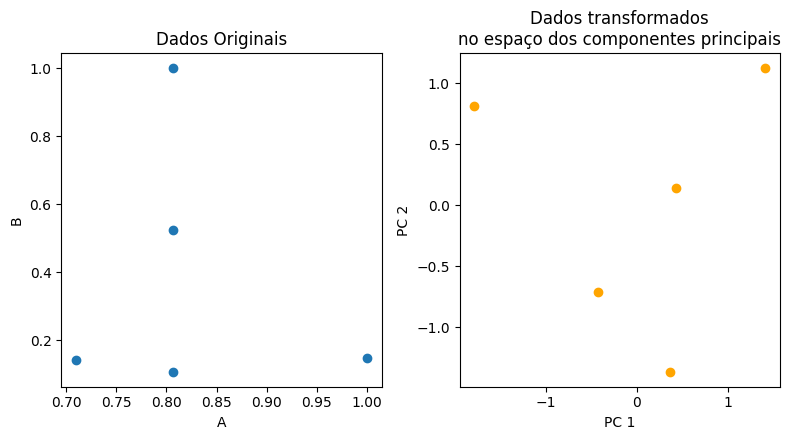

Componentes Principais:
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]

Autovalores (variância explicada):
 [1.42257517 1.07742483]

Dados transformados (PCA):
 [[ 1.41161068  1.12293554]
 [ 0.43290453  0.1442294 ]
 [ 0.36759155 -1.36445925]
 [-0.42472456 -0.7133997 ]
 [-1.7873822   0.81069401]]

Autovalores (variância explicada):
 [0.56903007 0.43096993]

Variância Acumulada:
 [0.56903007 1.        ]


In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Padronizar os dados
mean_data = np.mean(data, axis=0)
std_data = np.std(data, axis=0)
data_standardized = (data - mean_data) / std_data

# Aplicar PCA
pca = PCA(n_components=2)
pca.fit(data_standardized)

# Transformação dos dados no espaço dos componentes principais
data_pca = pca.transform(data_standardized)

plt.figure(figsize=(8, 4.5))
plt.subplot(1,2,1)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.title("Dados Originais")
plt.xlabel("A")
plt.ylabel("B")
plt.subplot(1,2,2)
plt.scatter(data_pca[:, 0], data_pca[:, 1],color='orange')
plt.title("Dados transformados\nno espaço dos componentes principais")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.tight_layout()
plt.show()

# Resultado dos componentes
print("Componentes Principais:\n", pca.components_)
print("\nAutovalores (variância explicada):\n", pca.explained_variance_)
print("\nDados transformados (PCA):\n", data_pca)
print("\nAutovalores (variância explicada):\n", pca.explained_variance_ratio_)
print("\nVariância Acumulada:\n", cumulative_variance)

# PCA, by defintion



In [31]:
# 1. Padronização dos dados
mean_data = np.mean(data, axis=0)
std_data = np.std(data, axis=0)
data_standardized = (data - mean_data) / std_data

# 2. Cálculo da matriz de covariância
cov_matrix = np.cov(data_standardized, rowvar=False)

# 3. Cálculo de autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 4. Ordenar autovalores e autovetores
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# 5. Transformação dos dados
data_pca = np.dot(data_standardized, eigenvectors)

print("Dados Padronizados:\n", data_standardized)
print("\nMatriz de Covariância:\n", cov_matrix)
print("\nAutovalores:\n", eigenvalues)
print("\nAutovetores:\n", eigenvectors)
print("\nDados transformados (PCA):\n", data_pca)

# 6. Calcular a variância explicada e acumulada
explained_variance = eigenvalues / eigenvalues.sum()
cumulative_variance = np.cumsum(explained_variance)

print("\nAutovalores:\n", eigenvalues)
print("\nVariância Explicada por cada Componente:\n", explained_variance)
print("\nVariância Acumulada:\n", cumulative_variance)


Dados Padronizados:
           A         B
0 -0.204124  1.792195
1 -0.204124  0.408095
2 -1.224745 -0.704892
3 -0.204124 -0.804775
4  1.837117 -0.690623

Matriz de Covariância:
 [[ 1.25       -0.17257517]
 [-0.17257517  1.25      ]]

Autovalores:
 [1.42257517 1.07742483]

Autovetores:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Dados transformados (PCA):
 [[-1.41161068  1.12293554]
 [-0.43290453  0.1442294 ]
 [-0.36759155 -1.36445925]
 [ 0.42472456 -0.7133997 ]
 [ 1.7873822   0.81069401]]

Autovalores:
 [1.42257517 1.07742483]

Variância Explicada por cada Componente:
 [0.56903007 0.43096993]

Variância Acumulada:
 [0.56903007 1.        ]
